Librerías


In [1]:
#Librería para lectura de archivos de entorno:
import os
from dotenv import load_dotenv

#Librerías para cálculo y gráficas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías para la conexión a BBDD:
import mysql.connector as sql
from mysql.connector import Error

from sqlalchemy import create_engine

#Librería para gráficos interactivos en python
import plotly.graph_objects as go
import plotly.express as px

#Librerías dash
from dash import Dash, dcc, html, Input, Output

Comprobación del directorio actual

In [2]:
diractual = os.getcwd()
diractual

'/Users/Edicion/Documents/Estudios/ProjecteIT/ProjecteData/Equip_G/Scripts'

Importación del csv del dataframe de limpieza.

Esta celda y la siguiente se pueden eliminar en caso de fusionarla con otros scripts.

In [3]:
df = pd.read_csv(r'../Data/2025_04_22_Sprint02.csv')

In [4]:
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,reviews_per_month,country,city,insert_date,amenities_normalized,days_occupied,occupancy_rate,supera_80,amenities_count,normalized_amenities
0,17249166,Arquitecte gaudi,Nuevo apartamento c�ntrico con buenos acabados...,109461701,Roses,NaN,Entire home/apt,5,1.0,2.0,...,9.0,spain,girona,2021-02-27,"24-hour check-in, air conditioning, bathroom e...",30,100.000000,True,15,"bed linens, elevator, essentials, extra pillow..."
1,23040910,Apartamento luminoso cerca del mar,Apartamento muy bonito a 200m de la playa y en...,17816909,Ciutadella de Menorca,NaN,Entire home/apt,4,1.0,1.0,...,3.0,spain,menorca,2021-02-27,"24-hour check-in, baby essentials, balcony, ba...",1,3.333333,True,24,"coffee maker, cooking basics, dedicated worksp..."
2,31968299,Villenpark Playa Arena House Flamenco,House with incredible garden and beautiful vie...,173153149,Lloret de Mar,NaN,Entire home/apt,5,1.0,2.0,...,NaN,spain,girona,2021-02-27,"balcony, barbecue utensils, bathroom essential...",30,100.000000,False,15,"bbq grill, coffee maker, dishes and silverware..."
3,26207763,Casa Flor.....somewhere different,"Built in the late 1950's, Casa Flor is a detac...",196976392,L'Escala,NaN,Entire home/apt,2,1.0,1.0,...,12.0,spain,girona,2021-02-27,"24-hour check-in, air conditioning, balcony, b...",30,100.000000,True,50,"barbecue utensils, bbq grill, bed linens, blue..."
4,19236052,Apartment with garden & pool - 800 m Pals beac...,Description<br /><br /><br /><br /><br /><br /...,133933726,Pals,NaN,Entire home/apt,7,2.0,3.0,...,3.0,spain,girona,2021-02-27,"air conditioning, baby essentials, balcony, ba...",30,100.000000,False,24,"bathtub, bed linens, coffee maker, cooking bas..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7676 entries, 0 to 7675
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 7676 non-null   int64  
 1   name                         7673 non-null   object 
 2   description                  7624 non-null   object 
 3   host_id                      7676 non-null   int64  
 4   neighbourhood_name           7676 non-null   object 
 5   neighbourhood_district       4658 non-null   object 
 6   room_type                    7676 non-null   object 
 7   accommodates                 7676 non-null   int64  
 8   bathrooms                    7639 non-null   float64
 9   bedrooms                     7640 non-null   float64
 10  beds                         7668 non-null   float64
 11  amenities_list               7676 non-null   object 
 12  price                        7676 non-null   float64
 13  minimum_nights    

In [6]:
# EDA de Experiencia del Cliente

df[['apartment_id', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month','city']].describe(include='all')

,apartment_id,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
count,7.676000e+03,6112,6113,6033.000000,6024.000000,6030.000000,6019.000000,6028.000000,6018.000000,6018.000000,6112.000000,7676
unique,NaN,1934,1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,2018-04-01,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,barcelona
freq,NaN,25,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2254
mean,1.698858e+07,NaN,NaN,919.640312,94.555113,93.135987,96.288420,96.358660,95.287471,91.417414,125.327880,NaN
std,8.742635e+06,NaN,NaN,89.181475,9.254170,9.979233,8.005516,7.929637,7.485543,9.643896,155.122907,NaN
min,1.196400e+04,NaN,NaN,200.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,NaN
25%,1.078457e+07,NaN,NaN,890.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,18.000000,NaN
50%,1.811248e+07,NaN,NaN,940.000000,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,58.000000,NaN
75%,2.365679e+07,NaN,NaN,980.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,181.000000,NaN


In [7]:
df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,reviews_per_month,country,city,insert_date,amenities_normalized,days_occupied,occupancy_rate,supera_80,amenities_count,normalized_amenities
0,17249166,Arquitecte gaudi,Nuevo apartamento c�ntrico con buenos acabados...,109461701,Roses,NaN,Entire home/apt,5,1.0,2.0,...,9.0,spain,girona,2021-02-27,"24-hour check-in, air conditioning, bathroom e...",30,100.000000,True,15,"bed linens, elevator, essentials, extra pillow..."
1,23040910,Apartamento luminoso cerca del mar,Apartamento muy bonito a 200m de la playa y en...,17816909,Ciutadella de Menorca,NaN,Entire home/apt,4,1.0,1.0,...,3.0,spain,menorca,2021-02-27,"24-hour check-in, baby essentials, balcony, ba...",1,3.333333,True,24,"coffee maker, cooking basics, dedicated worksp..."
2,31968299,Villenpark Playa Arena House Flamenco,House with incredible garden and beautiful vie...,173153149,Lloret de Mar,NaN,Entire home/apt,5,1.0,2.0,...,NaN,spain,girona,2021-02-27,"balcony, barbecue utensils, bathroom essential...",30,100.000000,False,15,"bbq grill, coffee maker, dishes and silverware..."
3,26207763,Casa Flor.....somewhere different,"Built in the late 1950's, Casa Flor is a detac...",196976392,L'Escala,NaN,Entire home/apt,2,1.0,1.0,...,12.0,spain,girona,2021-02-27,"24-hour check-in, air conditioning, balcony, b...",30,100.000000,True,50,"barbecue utensils, bbq grill, bed linens, blue..."
4,19236052,Apartment with garden & pool - 800 m Pals beac...,Description<br /><br /><br /><br /><br /><br /...,133933726,Pals,NaN,Entire home/apt,7,2.0,3.0,...,3.0,spain,girona,2021-02-27,"air conditioning, baby essentials, balcony, ba...",30,100.000000,False,24,"bathtub, bed linens, coffee maker, cooking bas..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7671,888635,Diagonal Av penthouse 2 terrace,This amazing penthouse is located on the corne...,2041901,la Dreta de l'Eixample,Eixample,Entire home/apt,6,2.0,2.0,...,NaN,spain,barcelona,2017-01-04,"air conditioning, bathroom essentials, bathroo...",30,100.000000,False,14,"air conditioning, cable tv, dryer, elevator in..."
7672,16166606,"Relax y tranquilidad junto al parque, en Gracia",En Gracia. Sol y luz. Exterior. Junto a un paq...,15079254,el Putxet i el Farr�,Sarri�-Sant Gervasi,Entire home/apt,3,1.0,2.0,...,NaN,spain,barcelona,2017-01-04,"air conditioning, bathroom essentials, bathroo...",30,100.000000,False,12,"elevator in building, essentials, family/kid f..."
7673,15695052,Wonderful room in the heart of BCN,Wonderful bedroom located in the heart of Barc...,958218,el Raval,Ciutat Vella,Private room,1,1.0,1.0,...,82.0,spain,barcelona,2017-01-04,"24-hour check-in, air conditioning, bathroom e...",1,3.333333,False,23,"24-hour check-in, air conditioning, buzzer/wir..."
7674,11198148,Habitaci�n en Sagrada Fam�lia,"El piso es muy agradable, acogedor, muy lumino...",58197742,la Sagrada Fam�lia,Eixample,Private room,1,2.0,1.0,...,NaN,spain,barcelona,2017-01-04,"24-hour check-in, air conditioning, buzzer/wir...",10,33.333333,False,10,"24-hour check-in, buzzer/wireless intercom, el..."


Cantidad de apartamentos sin reseñas

In [8]:
#Cantidad de apartamentos sin reseñas
sin_reseñas = df['first_review_date'].isna().sum()
print(f"Número de apartamentos sin reseñas: {sin_reseñas}")

#Porcentaje de apartamentos del total
porcentaje_sin_reseñas = (sin_reseñas / len(df)) * 100
print(f"Porcentaje de apartamentos sin reseñas: {porcentaje_sin_reseñas:.2f} %")

Número de apartamentos sin reseñas: 1564
Porcentaje de apartamentos sin reseñas: 20.38 %


Ránking de apartamentos con mejor rating

In [9]:
top_apartamentos_puntos = df.sort_values(['review_scores_rating', 'number_of_reviews'], ascending=False)
top_apartamentos_puntos.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,reviews_per_month,country,city,insert_date,amenities_normalized,days_occupied,occupancy_rate,supera_80,amenities_count,normalized_amenities
2241,11989301,Vivienda San Mart�n II,Rel�jate y desconecta mientras la c�lida luz v...,34840363,SANT FRANCESC,CIUTAT VELLA,Entire home/apt,4,1.0,1.0,...,394.0,spain,valencia,2019-12-31,"24-hour check-in, air conditioning, baby essen...",23,76.666667,True,70,"24-hour check-in, accessible-height bed, acces..."
3196,9122183,Casa sevillana en barrio historico,Habitaci�n luminosa con terraza privada para u...,47528412,Pio XII,Macarena,Private room,2,2.0,1.0,...,347.0,spain,sevilla,2019-07-29,"24-hour check-in, air conditioning, bathroom e...",30,100.000000,True,28,"accessible-height toilet, air conditioning, be..."
278,22979863,"Stylish Apt PZA MAYOR/La Latina 2BD* 2BT*, 6p max","Cozy and well-designed 2 bedroom apartment, co...",29281033,Palacio,Centro,Entire home/apt,6,2.0,2.0,...,376.0,spain,madrid,2021-01-12,"24-hour check-in, air conditioning, baby essen...",29,96.666667,True,34,"air conditioning, baby bath, bed linens, coffe..."
1238,23782265,Romantic and Rustic Penthouse with a Sun Kisse...,Marvel at an adorable cottage-like space in an...,40929334,ARRANCAPINS,EXTRAMURS,Entire home/apt,2,1.0,1.0,...,501.0,spain,valencia,2020-05-31,"air conditioning, balcony, bathroom essentials...",1,3.333333,True,42,"air conditioning, bath towel, bathroom essenti..."
916,22479174,Private room in detached house,"Cozy private room in a detached villa, near Ad...",80975261,Rejas,San Blas - Canillejas,Private room,2,2.0,1.0,...,327.0,spain,madrid,2020-08-25,"24-hour check-in, air conditioning, balcony, b...",4,13.333333,True,33,"breakfast, carbon monoxide alarm, coffee maker..."
1917,16292600,BCN Luxury,Lujoso apartamento en pleno centro de Barcelon...,15944590,l'Antiga Esquerra de l'Eixample,Eixample,Entire home/apt,4,2.0,2.0,...,274.0,spain,barcelona,2020-02-16,"24-hour check-in, air conditioning, baby essen...",12,40.000000,True,28,"air conditioning, coffee maker, cooking basics..."
568,1073748,"MAGIC PLACE IN BARCELONA, WITH POOL",<b>The space</b><br />MAGIC PLACE IN BARCELONA...,5159312,"Vallvidrera, el Tibidabo i les Planes",Sarri�-Sant Gervasi,Entire home/apt,4,1.0,1.0,...,101.0,spain,barcelona,2020-11-06,"air conditioning, baby essentials, balcony, ba...",30,100.000000,True,40,"air conditioning, beach essentials, bed linens..."
673,17384311,"Cubic House Garden, Cala Morlanda.",Cozy designer apartment located in a nice gar...,11087082,Manacor,NaN,Entire home/apt,3,1.0,1.0,...,196.0,spain,mallorca,2020-10-21,"24-hour check-in, air conditioning, baby essen...",0,0.000000,True,53,"air conditioning, baby bath, baking sheet, bar..."
1684,21916433,Typical majorcan house in Llucmajor,Cozy 2 floors family house with 5 double bedro...,159911693,Llucmajor,NaN,Entire home/apt,10,3.0,5.0,...,314.0,spain,mallorca,2020-03-22,"air conditioning, balcony, bathroom essentials...",9,30.000000,True,38,"bed linens, breakfast, cable tv, coffee maker,..."
4478,21925668,�tico con piscina Triana 2mm del Centro de sev...,Nous sommes � Triana � 2mm du centre de Sevill...,15589434,Triana Casco Antiguo,Triana,Entire home/apt,7,2.0,3.0,...,514.0,spain,sevilla,2019-02-18,"24-hour check-in, air conditioning, baby essen...",27,90.000000,True,48,"air conditioning, bbq grill, bed linens, buzze..."


Ranking de apartamentos con mayor número de evaluaciones

In [10]:
top_apartamentos_num_reviews = df.sort_values(['number_of_reviews', 'review_scores_rating'], ascending=False)
top_apartamentos_num_reviews.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,reviews_per_month,country,city,insert_date,amenities_normalized,days_occupied,occupancy_rate,supera_80,amenities_count,normalized_amenities
3439,384727,Private Room in Center of Seville,"located in the centre of Seville, offers accom...",1920069,Arenal,Casco Antiguo,Private room,2,1.0,1.0,...,681.0,spain,sevilla,2019-06-29,"24-hour check-in, air conditioning, bathroom e...",30,100.000000,True,13,"air conditioning, essentials, fire extinguishe..."
2296,959840,PL REAL (Sq) PENTHOUSE Rooftop,"Rustic penthous with old beams,old ceramic flo...",5223863,el Barri G�tic,Ciutat Vella,Private room,2,2.0,1.0,...,71.0,spain,barcelona,2019-12-10,"24-hour check-in, air conditioning, balcony, b...",26,86.666667,True,59,"24-hour check-in, accessible-height bed, acces..."
2016,1871218,�tico apartamento VFT/SE/00804,"�tico muy luminoso. Consta de: Sal�n, Ba�o, Co...",9751847,"Le�n XIII, Los Naranjos",Macarena,Entire home/apt,2,1.0,1.0,...,698.0,spain,sevilla,2020-01-30,"air conditioning, balcony, bathroom essentials...",7,23.333333,False,22,"air conditioning, cooking basics, essentials, ..."
981,3058631,"Private Studio in Sol, Madrid","We are offering a clean, well presented and re...",14370747,Sol,Centro,Entire home/apt,3,1.0,1.0,...,698.0,spain,madrid,2020-07-17,"24-hour check-in, air conditioning, bathroom e...",30,100.000000,True,27,"air conditioning, bed linens, buzzer/wireless ..."
236,526513,Sol. Your home in Madrid�s Heart,DESIGN apartment in the HEART of Madrid.<br />...,1134989,Sol,Centro,Entire home/apt,5,1.0,2.0,...,491.0,spain,madrid,2021-01-12,"24-hour check-in, air conditioning, baby essen...",23,76.666667,True,50,"air conditioning, baby bath, baby monitor, bab..."
715,3143400,Great room in the center of Madrid,"Bright room in hortaleza Street, next to Gran ...",15328893,Justicia,Centro,Private room,2,1.0,1.0,...,773.0,spain,madrid,2020-10-17,"air conditioning, balcony, bathroom essentials...",30,100.000000,True,21,"air conditioning, cable tv, coffee maker, cook..."
3592,681925,"Very Central, Stunning Views, Sunny Terrace, W...",FANTASTIC PENTHOUSE LOCATED IN THE CENTER OF V...,3462415,EL PILAR,CIUTAT VELLA,Entire home/apt,2,1.0,1.0,...,624.0,spain,valencia,2019-05-31,"24-hour check-in, air conditioning, balcony, b...",27,90.000000,True,29,"air conditioning, bed linens, carbon monoxide ..."
736,1670427,Walk everywhere!Brand new apartWIFI,The apartment is right in the center of Barce...,8843962,la Dreta de l'Eixample,Eixample,Entire home/apt,5,1.0,1.0,...,588.0,spain,barcelona,2020-10-12,"air conditioning, baby essentials, bathroom es...",3,10.000000,True,22,"air conditioning, bed linens, cooking basics, ..."
1750,4028518,Renovated & Vintage en Barcelona,Welcome to this cozy apartment located in the ...,20886062,la Sagrada Fam�lia,Eixample,Entire home/apt,4,1.0,2.0,...,712.0,spain,barcelona,2020-03-16,"24-hour check-in, air conditioning, baby essen...",1,3.333333,True,28,"air conditioning, buzzer/wireless intercom, co..."
1745,6289283,Cozy apartment near El Raval,Nice bright room with large private terrace (p...,32695481,el Raval,Ciutat Vella,Private room,2,1.0,1.0,...,78.0,spain,barcelona,2020-03-16,"24-hour check-in, air conditioning, balcony, b...",4,13.333333,True,23,"24-hour check-in, cable tv, dryer, elevator, e..."


#### Frecuencia de reseñas al mes por puntuación

<Axes: xlabel='review_scores_value', ylabel='reviews_per_month'>

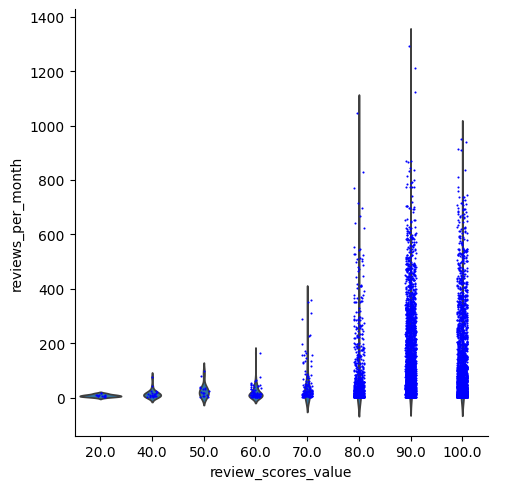

In [11]:
g = sns.catplot(data=df, x='review_scores_value', y='reviews_per_month', kind="violin", inner=None)
sns.stripplot(data=df, x='review_scores_value', y='reviews_per_month', color="b", size=1.5, ax=g.ax)

### Índice de satisfacción general

In [12]:
Indice_satisfaccion_general = df['review_scores_value'].sum() / df['apartment_id'].count()

print(f'El índice de satisfacción general es: {Indice_satisfaccion_general:.2f}')

El índice de satisfacción general es: 71.67


In [13]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = Indice_satisfaccion_general,
    title = {'text': "Índice de satisfacción general"},
    delta = {'reference': 73.78},
    gauge= {'axis': {'visible': False}}
))

fig.show()

## KPI 4 - Ítem con la mayor puntuación promedio

In [14]:
# Diccionario para traducir los nombres de las columnas de evaluación específicas
traducciones = {
    'review_scores_accuracy': 'Precisión',
    'review_scores_cleanliness': 'Limpieza',
    'review_scores_checkin': 'Registro',
    'review_scores_communication': 'Comunicaciones',
    'review_scores_location': 'Ubicación'
}

# Columnas originales
cols = list(traducciones.keys())

# Calcular la media de cada una (ignorando NaN)
mean_scores = df[cols].mean().rename(traducciones)

print(mean_scores)

# Mostrar la métrica con mayor media
max_metric = mean_scores.idxmax()
max_value = mean_scores.max()

print(f"La métrica con la mayor puntuación promedio es: {max_metric} con un valor de {max_value:.2f}")

Precisión         94.555113
Limpieza          93.135987
Registro          96.288420
Comunicaciones    96.358660
Ubicación         95.287471
dtype: float64
La métrica con la mayor puntuación promedio es: Comunicaciones con un valor de 96.36


Representación gráfica

[Text(0, 0, '93.14'),
 Text(0, 0, '94.56'),
 Text(0, 0, '95.29'),
 Text(0, 0, '96.29'),
 Text(0, 0, '96.36')]

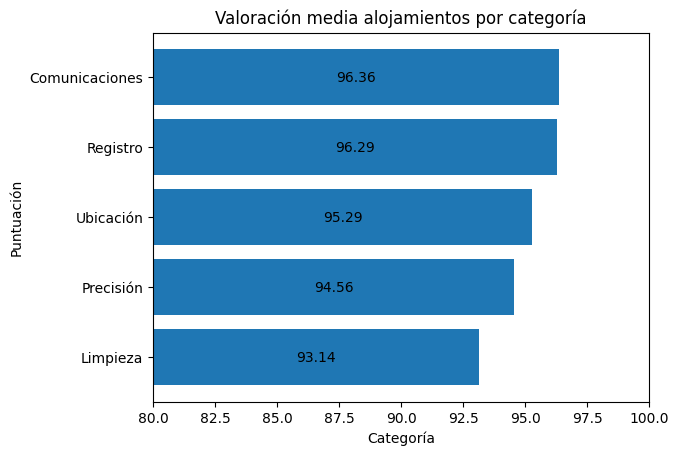

In [15]:
mean_sorted = mean_scores.sort_values(ascending=True)
plt.barh(mean_sorted.index, mean_sorted.values)
plt.xlim(80, 100)
plt.xlabel('Categoría')
plt.ylabel('Puntuación')
plt.title('Valoración media alojamientos por categoría')
plt.bar_label(plt.gca().containers[0], fmt='%.2f', label_type='center')

Gráfica de radar para representar las puntuaciones

In [16]:
#Trazamos la gráfica de radar

fig = px.line_polar(df, r=mean_scores.values, theta=mean_scores.index, range_r=(90, 100), line_close=True)
fig.update_traces(fill='toself')

#Añadimos los valores

fig.add_trace(go.Scatterpolar(
    r=mean_scores.values,
    theta=mean_scores.index,
    mode='markers+text',
    marker=dict(color='blue', size=5, symbol='circle'),
    text=mean_scores.values.round(2),
    textposition='top center',
    name='Valores',
    showlegend=False
))

#Marcamos el valor máximo

fig.add_trace(go.Scatterpolar(
    r=[max_value],
    theta=[max_metric],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='Valor máximo',
    showlegend=False
))

### Respuestas de negocio

#### Sprint 01

Puntuación media de los usuarios

In [17]:
media_valor = df['review_scores_value'].mean()
print(f"Puntuación media otorgada por los usuarios: {media_valor:.2f}")

Puntuación media otorgada por los usuarios: 91.42


In [18]:
fig = go.Figure(go.Indicator(
    mode = "number+gauge",
    gauge = {'shape': "bullet", 
             'axis': {'visible': False}},
    delta = {'reference': 100}, #Aunque la referencia no es necesaria si no ponemos el tope
    value = media_valor,
    domain = {'x': [0.2, 1], 'y': [0.2, 0.9]},
    title = {'text': "Puntuación media general",
             'align': 'right'}))

fig.show()

 Porcentaje de alojamientos por ciudad que superan una puntuación de 80

In [19]:

# Crear una columna booleana para marcar los que superan 80
df['supera_80'] = df['review_scores_value'] > 80

# Agrupar por ciudad y calcular el porcentaje
porcentaje_por_ciudad = (
    df.groupby('city')['supera_80']
    .mean().sort_values(ascending=False) * 100
).round(2)

print(pd.DataFrame(porcentaje_por_ciudad))


           supera_80
city                
sevilla        83.62
valencia       80.83
malaga         77.35
madrid         72.64
barcelona      65.13
menorca        59.04
mallorca       56.58
girona         51.63


In [20]:
porcentaje_por_ciudad.info()

<class 'pandas.core.series.Series'>
Index: 8 entries, sevilla to girona
Series name: supera_80
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 128.0+ bytes


In [21]:
porcentaje_por_ciudad = pd.DataFrame(porcentaje_por_ciudad)
porcentaje_por_ciudad.info()
                                     

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, sevilla to girona
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   supera_80  8 non-null      float64
dtypes: float64(1)
memory usage: 128.0+ bytes


/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_4332/1923502712.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




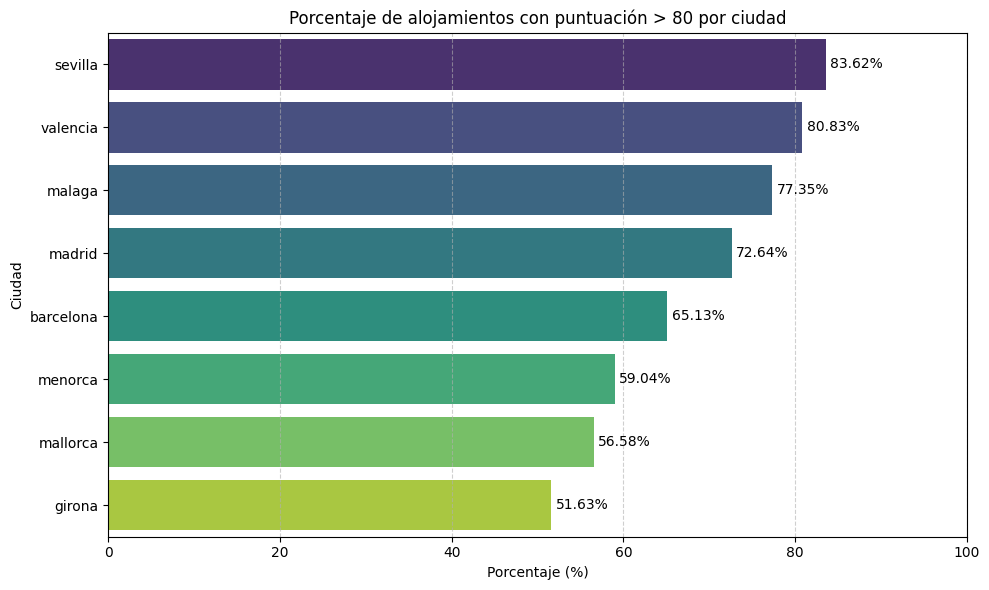

In [22]:
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=porcentaje_por_ciudad, x='supera_80', y='city', palette='viridis')

# Anotar porcentajes
for index, row in porcentaje_por_ciudad.iterrows():
    plt.text(row['supera_80'] + 0.5, index, f"{row['supera_80']}%", va='center')

# Ajustes visuales
plt.title('Porcentaje de alojamientos con puntuación > 80 por ciudad')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Ciudad')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Sprint 02

¿Qué aspectos (precisión, higiene, registro o comunicaciones) presentan mayores diferencias entre los alojamientos mejor y peor valorados en la evaluación general? 

In [23]:
cols.remove('review_scores_location')
print(cols)

['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']


In [24]:
# Eliminar filas con valores nulos en estas columnas y en la puntuación global
df_clean = df.dropna(subset=cols + ['review_scores_value'])

df_clean

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,reviews_per_month,country,city,insert_date,amenities_normalized,days_occupied,occupancy_rate,supera_80,amenities_count,normalized_amenities
0,17249166,Arquitecte gaudi,Nuevo apartamento c�ntrico con buenos acabados...,109461701,Roses,NaN,Entire home/apt,5,1.0,2.0,...,9.0,spain,girona,2021-02-27,"24-hour check-in, air conditioning, bathroom e...",30,100.000000,True,15,"bed linens, elevator, essentials, extra pillow..."
1,23040910,Apartamento luminoso cerca del mar,Apartamento muy bonito a 200m de la playa y en...,17816909,Ciutadella de Menorca,NaN,Entire home/apt,4,1.0,1.0,...,3.0,spain,menorca,2021-02-27,"24-hour check-in, baby essentials, balcony, ba...",1,3.333333,True,24,"coffee maker, cooking basics, dedicated worksp..."
3,26207763,Casa Flor.....somewhere different,"Built in the late 1950's, Casa Flor is a detac...",196976392,L'Escala,NaN,Entire home/apt,2,1.0,1.0,...,12.0,spain,girona,2021-02-27,"24-hour check-in, air conditioning, balcony, b...",30,100.000000,True,50,"barbecue utensils, bbq grill, bed linens, blue..."
4,19236052,Apartment with garden & pool - 800 m Pals beac...,Description<br /><br /><br /><br /><br /><br /...,133933726,Pals,NaN,Entire home/apt,7,2.0,3.0,...,3.0,spain,girona,2021-02-27,"air conditioning, baby essentials, balcony, ba...",30,100.000000,False,24,"bathtub, bed linens, coffee maker, cooking bas..."
7,4079653,VERY LUMINOUS APARTMENT,This apartment is located very close to the ce...,21160988,Centro,NaN,Entire home/apt,3,1.0,1.0,...,161.0,spain,malaga,2021-02-27,"24-hour check-in, air conditioning, balcony, b...",1,3.333333,True,33,"air conditioning, bed linens, cable tv, coffee..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,4806720,Comfortable apartment for 5 people Poble sec BCN,"Stunning apartment for 5 people, with refined ...",1683936,el Poble Sec,Sants-Montju�c,Entire home/apt,5,1.0,2.0,...,9.0,spain,barcelona,2017-01-04,"air conditioning, bathroom extras, buzzer/wire...",4,13.333333,False,12,"buzzer/wireless intercom, elevator in building..."
7664,13877909,Charming Sunny Room in the Centre,Charming room for two in the center of Barcelo...,82104517,la Nova Esquerra de l'Eixample,Eixample,Private room,2,1.0,1.0,...,229.0,spain,barcelona,2017-01-04,"24-hour check-in, air conditioning, bathroom e...",2,6.666667,True,17,"24-hour check-in, breakfast, cable tv, dog(s),..."
7666,2840800,Centric Sagrada Familia Mimosa,"This welcoming, one-bedroom apartment in Barce...",5021580,la Sagrada Fam�lia,Eixample,Entire home/apt,4,1.0,0.0,...,36.0,spain,barcelona,2017-01-04,"air conditioning, bathroom essentials, elevato...",23,76.666667,False,9,"air conditioning, elevator in building, essent..."
7668,1756975,CHIC & CHEAP ;),Hola! Welcome to Barcelona ;) Located in one o...,8965423,Vilapicina i la Torre Llobeta,Nou Barris,Entire home/apt,5,1.0,2.0,...,97.0,spain,barcelona,2017-01-04,"24-hour check-in, air conditioning, bathroom e...",26,86.666667,True,17,"24-hour check-in, air conditioning, buzzer/wir..."


In [25]:
df_mediana = df_clean.groupby('review_scores_value')[cols].median().reset_index()
df_mediana

,review_scores_value,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication
0,20.0,20.0,20.0,60.0,60.0
1,40.0,60.0,60.0,70.0,80.0
2,50.0,70.0,60.0,90.0,80.0
3,60.0,80.0,80.0,85.0,85.0
4,70.0,80.0,80.0,90.0,90.0
5,80.0,90.0,90.0,90.0,90.0
6,90.0,100.0,90.0,100.0,100.0
7,100.0,100.0,100.0,100.0,100.0


In [26]:
max_review_value = df_mediana['review_scores_value'].max()
print(max_review_value)

100.0


In [27]:
min_review_value = df_mediana['review_scores_value'].min()
print(min_review_value)

20.0


In [28]:


# Identificar el alojamiento mejor y peor valorado
mejor = df_mediana.loc[df_mediana['review_scores_value'].idxmax()]
peor = df_mediana.loc[df_mediana['review_scores_value'].idxmin()]

print(mejor)
print(peor)


review_scores_value            100.0
review_scores_accuracy         100.0
review_scores_cleanliness      100.0
review_scores_checkin          100.0
review_scores_communication    100.0
Name: 7, dtype: float64
review_scores_value            20.0
review_scores_accuracy         20.0
review_scores_cleanliness      20.0
review_scores_checkin          60.0
review_scores_communication    60.0
Name: 0, dtype: float64


In [29]:

# Calcular diferencias
diferencias = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)

print(diferencias)


Registro          40.0
Comunicaciones    40.0
Precisión         80.0
Limpieza          80.0
dtype: float64


El aspecto con la valoración más dispar es: Precisión con una diferencia de 80.00 puntos


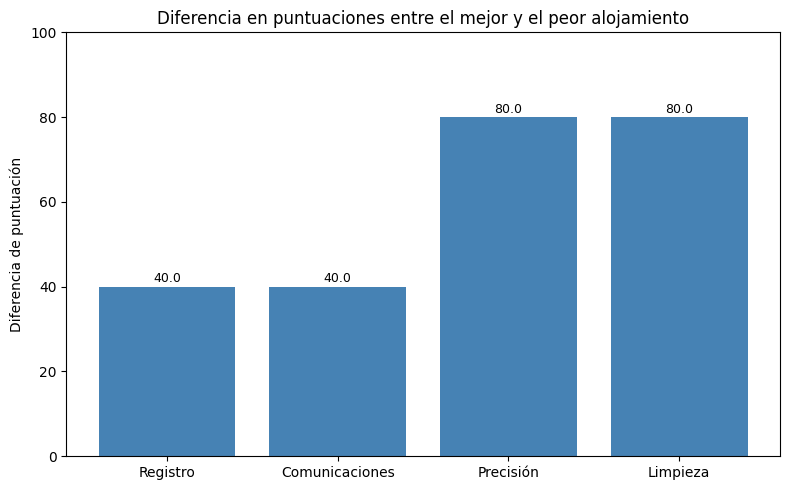

In [30]:

max_item = diferencias.idxmax()
max_diferencia = diferencias.max()

print(f"El aspecto con la valoración más dispar es: {max_item} con una diferencia de {max_diferencia:.2f} puntos")

# Gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(diferencias.index, diferencias.values, color='steelblue')
plt.title('Diferencia en puntuaciones entre el mejor y el peor alojamiento', fontsize=12)
plt.ylabel('Diferencia de puntuación')
plt.ylim(0, 100)

# Etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()


In [31]:
# Gráfica de radar plotly
#Trazamos la gráfica de radar

fig = px.line_polar(df, r=diferencias.values, theta=diferencias.index, range_r=(0, 100), line_close=True)
fig.update_traces(fill='toself')

#Añadimos los valores

fig.add_trace(go.Scatterpolar(
    r=diferencias.values,
    theta=diferencias.index,
    mode='markers+text',
    marker=dict(color='blue', size=5, symbol='circle'),
    text=diferencias.values,
    textposition='top center',
    name='Valores',
    showlegend=False
))

#Marcamos el valor máximo

fig.add_trace(go.Scatterpolar(
    r=[max_diferencia],
    theta=[max_item],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='Valor máximo',
    showlegend=False
))

Segmentamos por ciudad

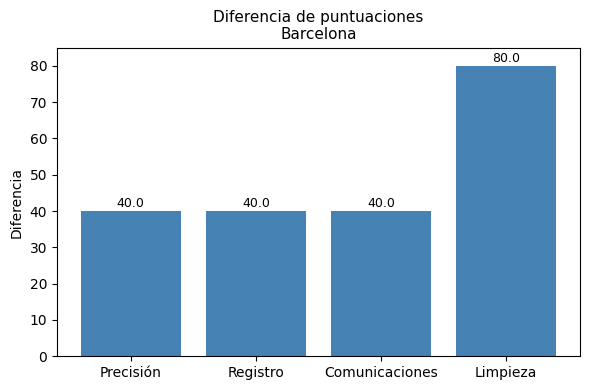

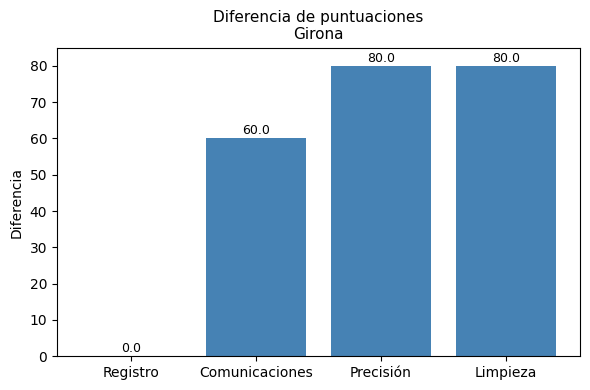

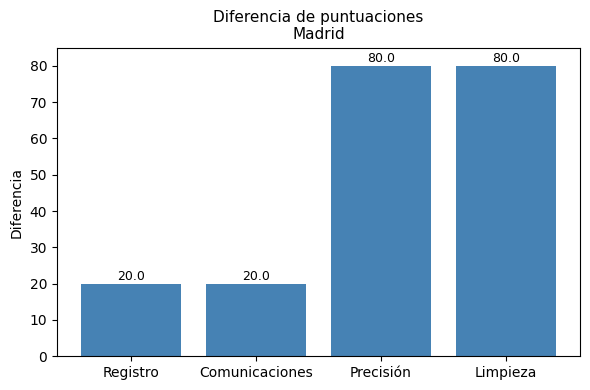

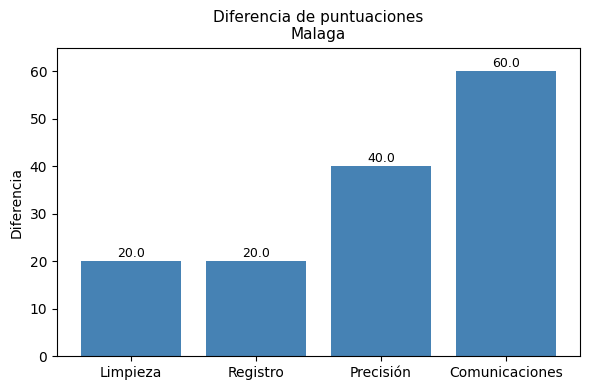

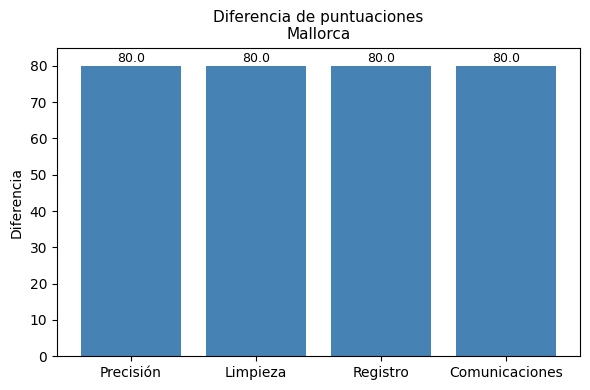

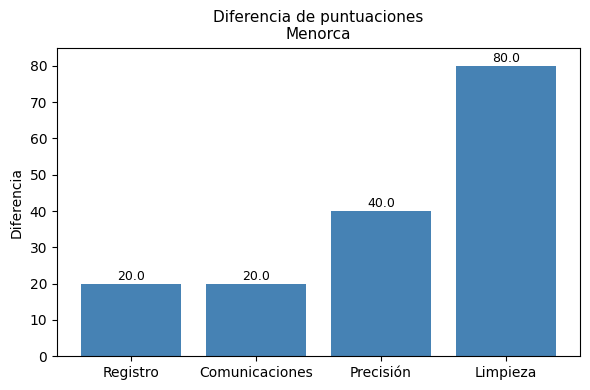

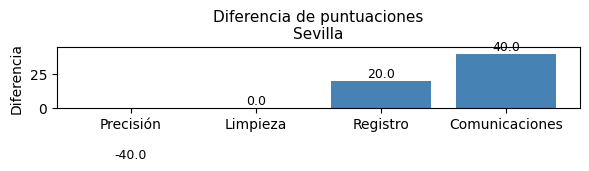

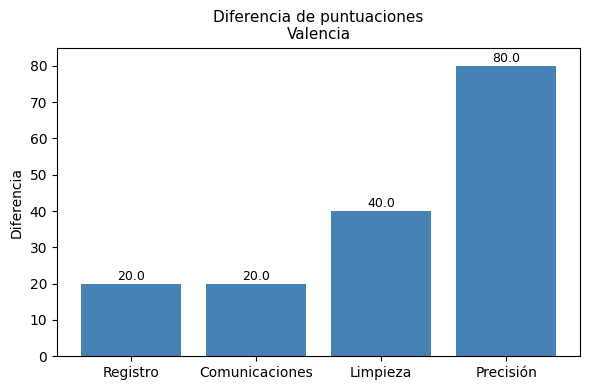

In [32]:
# Filtrar filas con datos completos
df_clean = df.dropna(subset=cols + ['review_scores_value', 'city'])

# Agrupar solo por ciudad
grouped = df_clean.groupby('city')

# Crear gráfico por ciudad
for city, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    difs = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)
    
    plt.figure(figsize=(6, 4))
    bars = plt.bar(difs.index, difs.values, color='steelblue')
    plt.title(f"Diferencia de puntuaciones\n{city.capitalize()}", fontsize=11)
    plt.ylim(0, max(difs.values)+5)
    plt.ylabel("Diferencia")
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()


In [33]:
# Para cada ciudad, generar un gráfico de radar
for city, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    diferencias = (mejor[cols] - peor[cols])
    
    # Datos para resaltar el valor máximo
    max_item = diferencias.idxmax().replace('review_scores_', '').capitalize()
    max_diferencia = diferencias.max()

    # Convertir índices para visualización
    theta_labels = diferencias.index.str.replace('review_scores_', '').str.capitalize()

    # Crear figura polar (radar)
    fig = px.line_polar(
        r=diferencias.values,
        theta=theta_labels,
        range_r=(0, max(diferencias.values) + 5),
        line_close=True,
        title=f"Diferencia de puntuaciones entre el mejor y peor alojamiento en {city}"
    )
    fig.update_traces(fill='toself')

    # Añadir puntos y valores
    fig.add_trace(go.Scatterpolar(
        r=diferencias.values,
        theta=theta_labels,
        mode='markers+text',
        marker=dict(color='blue', size=5, symbol='circle'),
        text=[f'{v:.1f}' for v in diferencias.values],
        textposition='top center',
        name='Valores',
        showlegend=False
    ))

    # Marcar el valor máximo
    fig.add_trace(go.Scatterpolar(
        r=[max_diferencia],
        theta=[max_item],
        mode='markers',
        marker=dict(color='red', size=10, symbol='circle'),
        name='Valor máximo',
        showlegend=False
    ))

    fig.show()

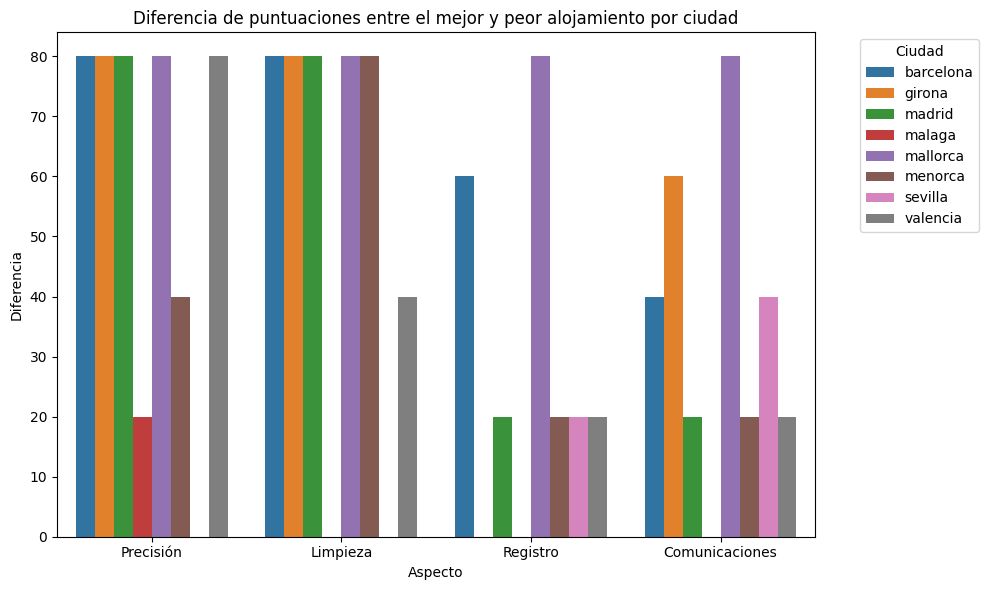

In [34]:
#Gráfica de barras apilada

#Agrupar por ciudad y calcular diferencias
records = []
for city, group in df_clean.groupby('city'):
    mejor = group.loc[group['review_scores_rating'].idxmax()]
    peor = group.loc[group['review_scores_rating'].idxmin()]
    diferencias = (mejor[cols] - peor[cols]).rename(traducciones)
    for aspecto, valor in diferencias.items():
        records.append({
            'Ciudad': city,
            'Aspecto': aspecto,
            'Diferencia': valor
        })

# Crear DataFrame en formato largo
long_df = pd.DataFrame(records)

# Crear gráfica
plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x='Aspecto', y='Diferencia', hue='Ciudad')

# Ajustes estéticos
plt.title("Diferencia de puntuaciones entre el mejor y peor alojamiento por ciudad")
plt.ylabel("Diferencia")
plt.legend(title="Ciudad", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Segmentamos por tipo de alojamiento

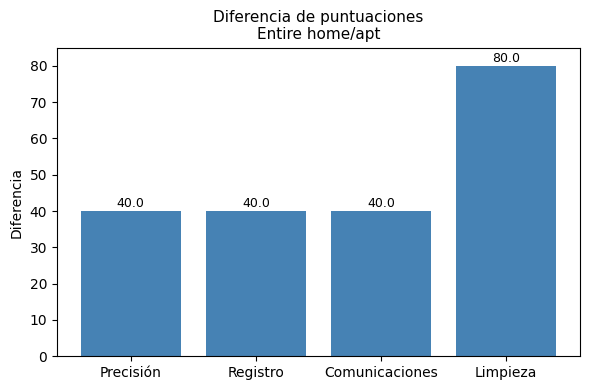

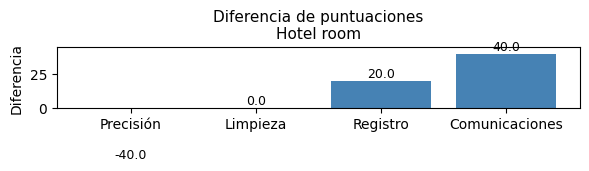

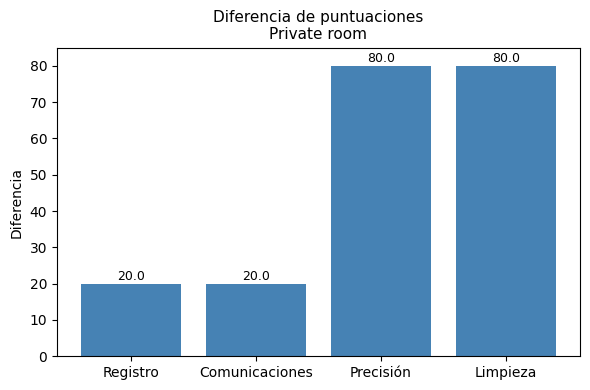

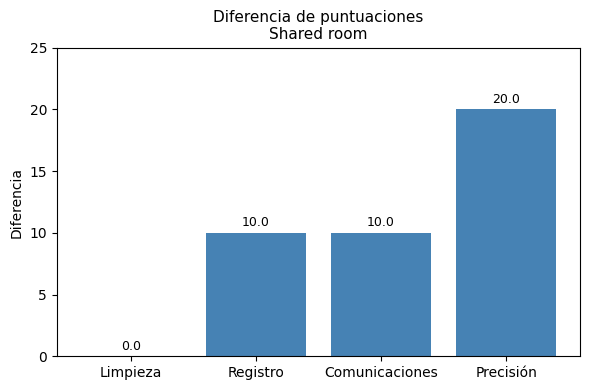

In [35]:
# Filtrar filas con datos completos
df_clean = df.dropna(subset=cols + ['review_scores_value', 'room_type'])

# Agrupar solo por tipo de alojamiento
grouped = df_clean.groupby('room_type')

# Crear gráfico por tipo de alojamiento
for room_type, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    difs = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)
    
    plt.figure(figsize=(6, 4))
    bars = plt.bar(difs.index, difs.values, color='steelblue')
    plt.title(f"Diferencia de puntuaciones\n{room_type.capitalize()}", fontsize=11)
    plt.ylim(0, max(difs.values)+5)
    plt.ylabel("Diferencia")
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

In [36]:
# Para cada tipo de alojamiento, generar un gráfico de radar
for room_type, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    diferencias = (mejor[cols] - peor[cols])
    
    # Datos para resaltar el valor máximo
    max_item = diferencias.idxmax().replace('review_scores_', '').capitalize()
    max_diferencia = diferencias.max()

    # Convertir índices para visualización
    theta_labels = diferencias.index.str.replace('review_scores_', '').str.capitalize()

    # Crear figura polar (radar)
    fig = px.line_polar(
        r=diferencias.values,
        theta=theta_labels,
        range_r=(0, max(diferencias.values) + 5),
        line_close=True,
        title=f"Diferencia de puntuaciones entre el mejor y peor alojamiento en {room_type}"
    )
    fig.update_traces(fill='toself')

    # Añadir puntos y valores
    fig.add_trace(go.Scatterpolar(
        r=diferencias.values,
        theta=theta_labels,
        mode='markers+text',
        marker=dict(color='blue', size=5, symbol='circle'),
        text=[f'{v:.1f}' for v in diferencias.values],
        textposition='top center',
        name='Valores',
        showlegend=False
    ))

    # Marcar el valor máximo
    fig.add_trace(go.Scatterpolar(
        r=[max_diferencia],
        theta=[max_item],
        mode='markers',
        marker=dict(color='red', size=10, symbol='circle'),
        name='Valor máximo',
        showlegend=False
    ))

    fig.show()

In [37]:
# Todos los trazos en el mismo gráfico de radas
# Inicializar figura
fig = go.Figure()

# Añadir una traza por tipo de alojamiento
for room_type, group in grouped:
    mejor = group.loc[group['review_scores_value'].idxmax()]
    peor = group.loc[group['review_scores_value'].idxmin()]
    diferencias = (mejor[cols] - peor[cols])

    # Etiquetas más limpias
    theta_labels = diferencias.index.str.replace('review_scores_', '').str.capitalize()
    r_values = diferencias.values

    fig.add_trace(go.Scatterpolar(
        r=r_values,
        theta=theta_labels,
        fill='toself',
        name=room_type,
        mode='lines+markers',
        opacity=0.6  # Mejora la legibilidad al superponer
    ))

# Configuración del gráfico
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df_clean[cols].max().max()]
        )
    ),
    title="Comparativa de diferencias de puntuaciones entre el mejor y peor alojamiento por tipo de alojamiento",
    showlegend=True
)

fig.show()
